# Base

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('goldstock.csv')
df = df.drop('Index', axis=1)

df_with_volume = df.copy()

df_without_volume = df.drop(columns=['Volume'])

scaler = StandardScaler()

df_with_volume[['Close/Last', 'Volume', 'Open', 'High', 'Low']] = scaler.fit_transform(df_with_volume[['Close/Last', 'Volume', 'Open', 'High', 'Low']])


# Ensure the 'Date' column is in datetime format
df_without_volume['Date'] = pd.to_datetime(df_without_volume['Date'], dayfirst=True)

# Sort the dataframe by date
df_without_volume = df_without_volume.sort_values('Date')

# Define window sizes for lag features and rolling statistics
window_sizes = [10, 20, 50, 200]
rolling_windows = [20, 50, 200]

# Dictionary to store dataframes for each window size
dfs_by_window_size = {}

# Create separate dataframes for each window size
for window_size in window_sizes:
    # Create a copy of the original dataframe
    df_window = df_without_volume.copy()
    
    # Create lag features for the current window size
    for i in range(1, window_size + 1):
        df_window[f'Close/Last_Lag_{i}_Window_{window_size}'] = df_window['Close/Last'].shift(i)
    """
    # Add rolling statistics for the current window size if applicable
    if window_size in rolling_windows:
        df_window[f'Close/Last_Rolling_Mean_{window_size}'] = df_window['Close/Last'].rolling(window=window_size).mean()
        df_window[f'Close/Last_Rolling_Std_{window_size}'] = df_window['Close/Last'].rolling(window=window_size).std()
    """
    # Drop rows with NaN values (which will be the first 'window_size' rows for the largest window size)
    df_window = df_window.dropna()
    
    # Reset index after dropping rows
    df_window = df_window.reset_index(drop=True)
    
    # Store the dataframe in the dictionary
    dfs_by_window_size[window_size] = df_window


C:\Users\Vaquita\AppData\Local\Temp\ipykernel_11776\2186368099.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_window[f'Close/Last_Lag_{i}_Window_{window_size}'] = df_window['Close/Last'].shift(i)
C:\Users\Vaquita\AppData\Local\Temp\ipykernel_11776\2186368099.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_window[f'Close/Last_Lag_{i}_Window_{window_size}'] = df_window['Close/Last'].shift(i)
C:\Users\Vaquita\AppData\Local\Temp\ipykernel_11776\2186368099.py:36: PerformanceWarning: DataFrame is highly fragmented.  T

# Data Preprocessing

# .1. Load DS

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('goldstock.csv')

# Display the first 5 rows
print(df.head(5))

# Show the number of rows and columns
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

   Index        Date  Close/Last  Volume    Open    High     Low
0   2528  07/07/2014      1317.0   79110  1321.4  1321.7  1312.1
1   2527  08/07/2014      1316.5  126706  1320.8  1325.7  1314.3
2   2526  09/07/2014      1324.3  155101  1320.4  1333.4  1318.7
3   2525  10/07/2014      1339.2  167391  1325.0  1346.8  1325.0
4   2524  11/07/2014      1337.4   88470  1336.5  1340.4  1334.6
The dataset contains 2511 rows and 7 columns.


In [23]:
# Group by the 'Index' column
grouped = df.groupby('Index')

# Print all tuples with the same index, skipping groups with only one row
for index, group in grouped:
    if len(group) > 1:
        print(f"Index: {index}")
        print(group)
        print("\n")

# .2. Handling Missing Values

In [3]:
# Check for missing values
print(df.isnull().sum())

# Impute missing values with the mean of the column
# df.fillna(df.mean(), inplace=True)

# Verify that there are no missing values left
# print(df.isnull().sum())

Index         0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


# .3. Resampling (not needed since our prediction is in days)

# .4. Scaling (skip for now)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select the features to scale (excluding the 'Date' column)
features = df_cleaned.columns.difference(['Date'])

# Fit and transform the features
df_cleaned[features] = scaler.fit_transform(df_cleaned[features])

# Display the first 5 rows of the scaled dataset
print(df_cleaned.head())
# ------------------------------------------------

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
data[features] = scaler.fit_transform(data[features])

# EDA

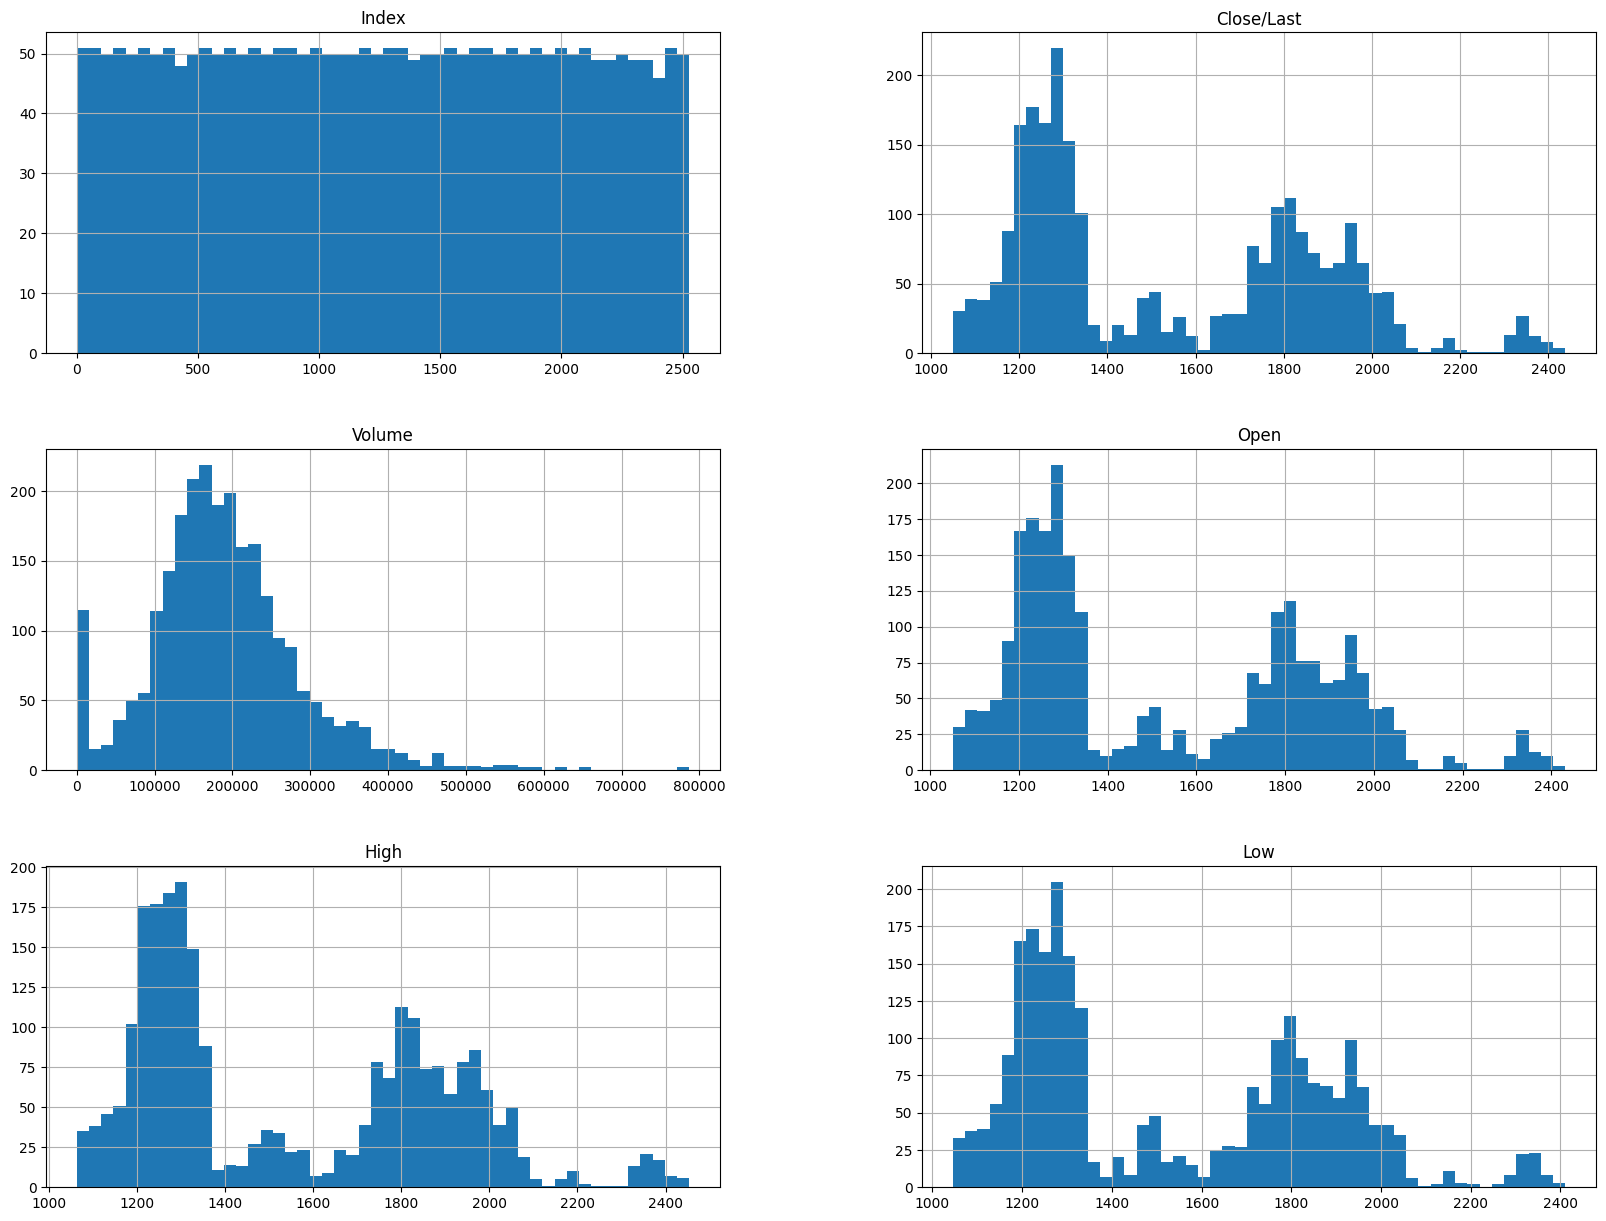

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each feature
df.hist(bins=50, figsize=(20, 15))
plt.show()

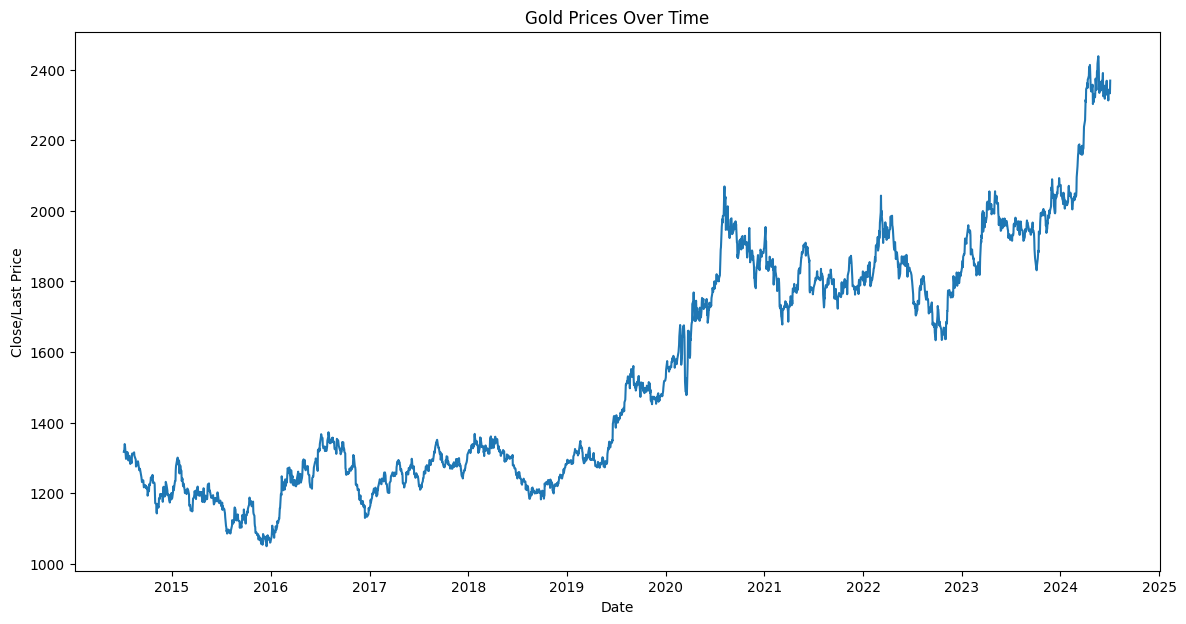

In [7]:
# Convert 'Date' column to datetime with day first
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plot the 'Close/Last' prices over time
plt.figure(figsize=(14, 7))
plt.plot(df['Close/Last'])
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.show()

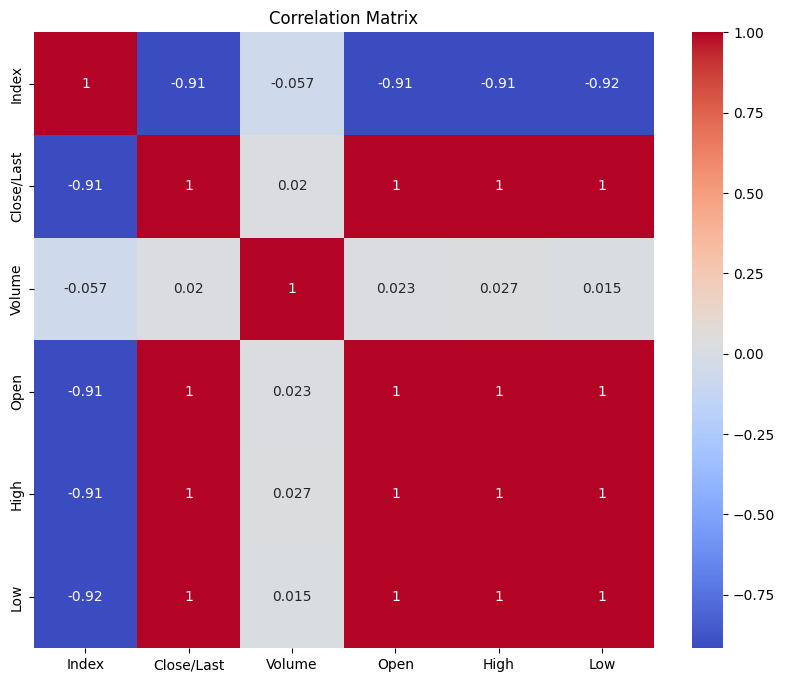

               Index  Close/Last    Volume      Open      High       Low
Index       1.000000   -0.914928 -0.056636 -0.914731 -0.913637 -0.916239
Close/Last -0.914928    1.000000  0.019551  0.999135  0.999589  0.999644
Volume     -0.056636    0.019551  1.000000  0.023158  0.027213  0.015087
Open       -0.914731    0.999135  0.023158  1.000000  0.999544  0.999473
High       -0.913637    0.999589  0.027213  0.999544  1.000000  0.999369
Low        -0.916239    0.999644  0.015087  0.999473  0.999369  1.000000


In [11]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(corr_matrix)

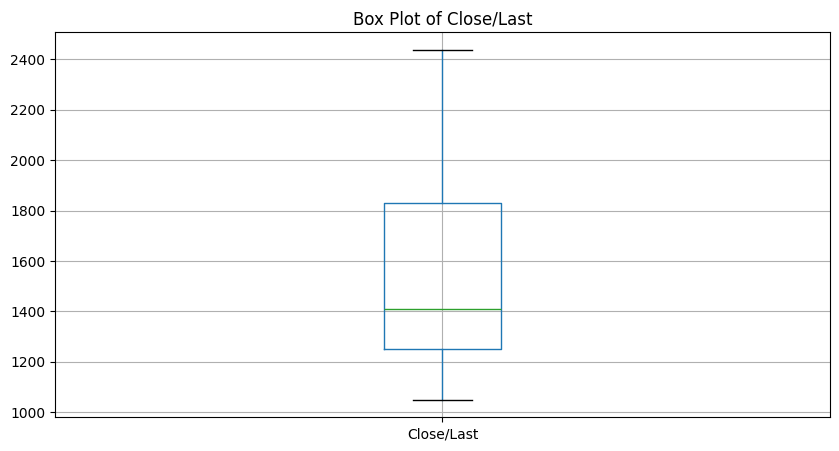

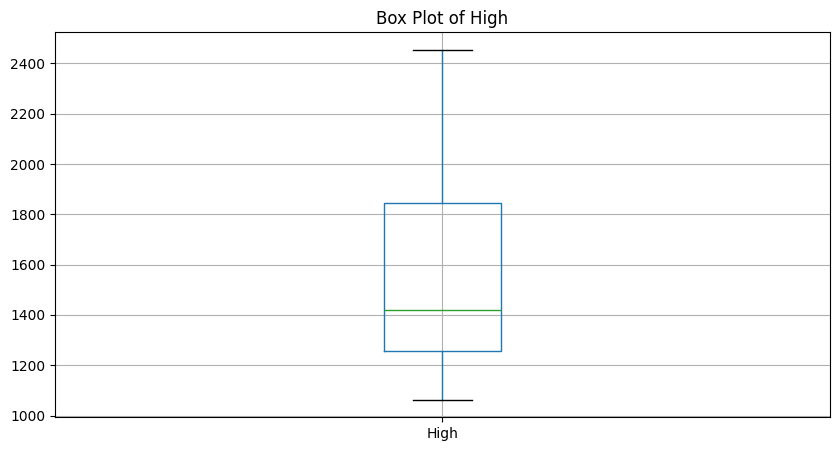

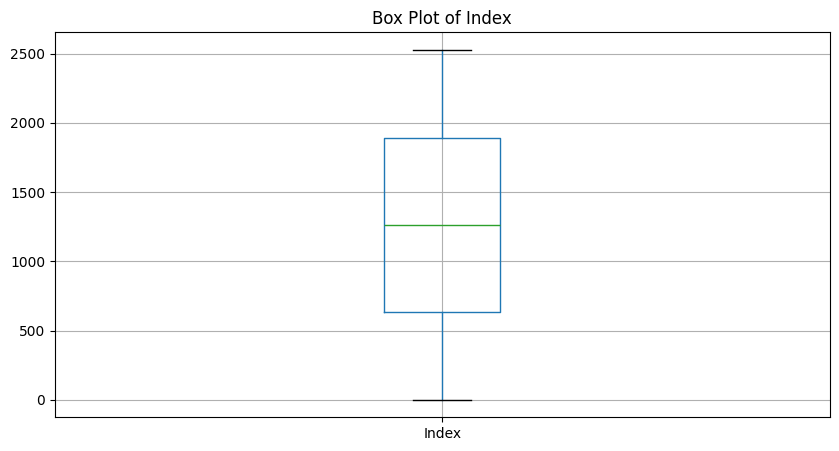

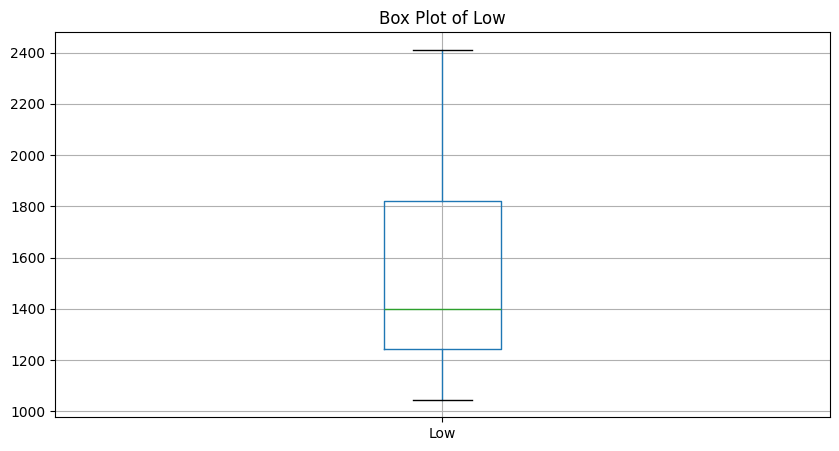

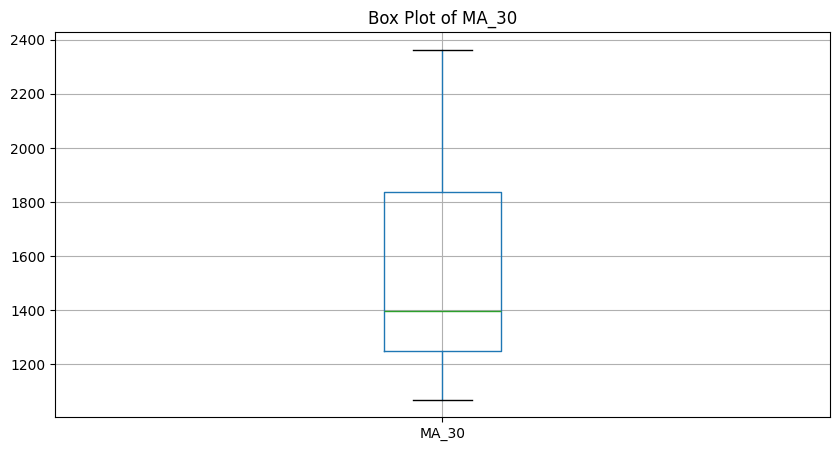

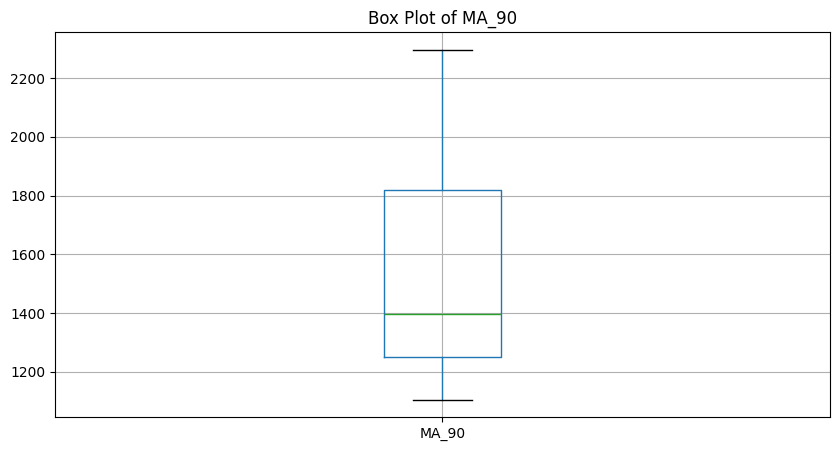

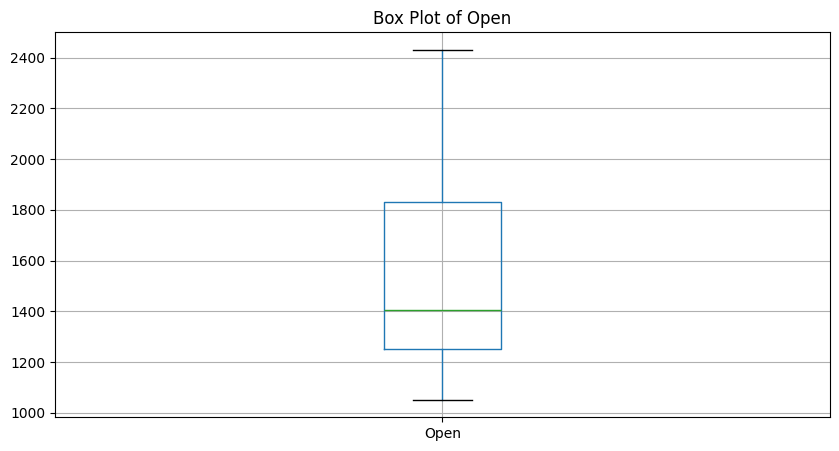

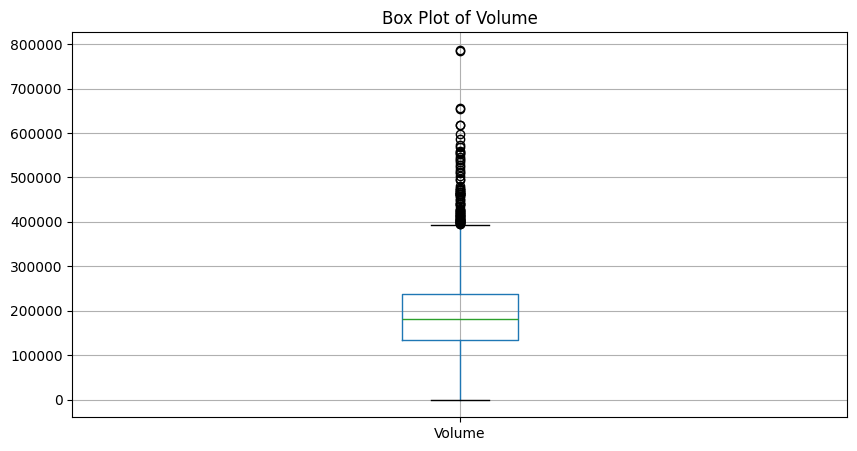

In [16]:

# List of features to plot
features = df.columns.difference(['Date'])

# Plot box plots for each feature separately
for feature in features:
    plt.figure(figsize=(10, 5))
    df.boxplot(column=[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

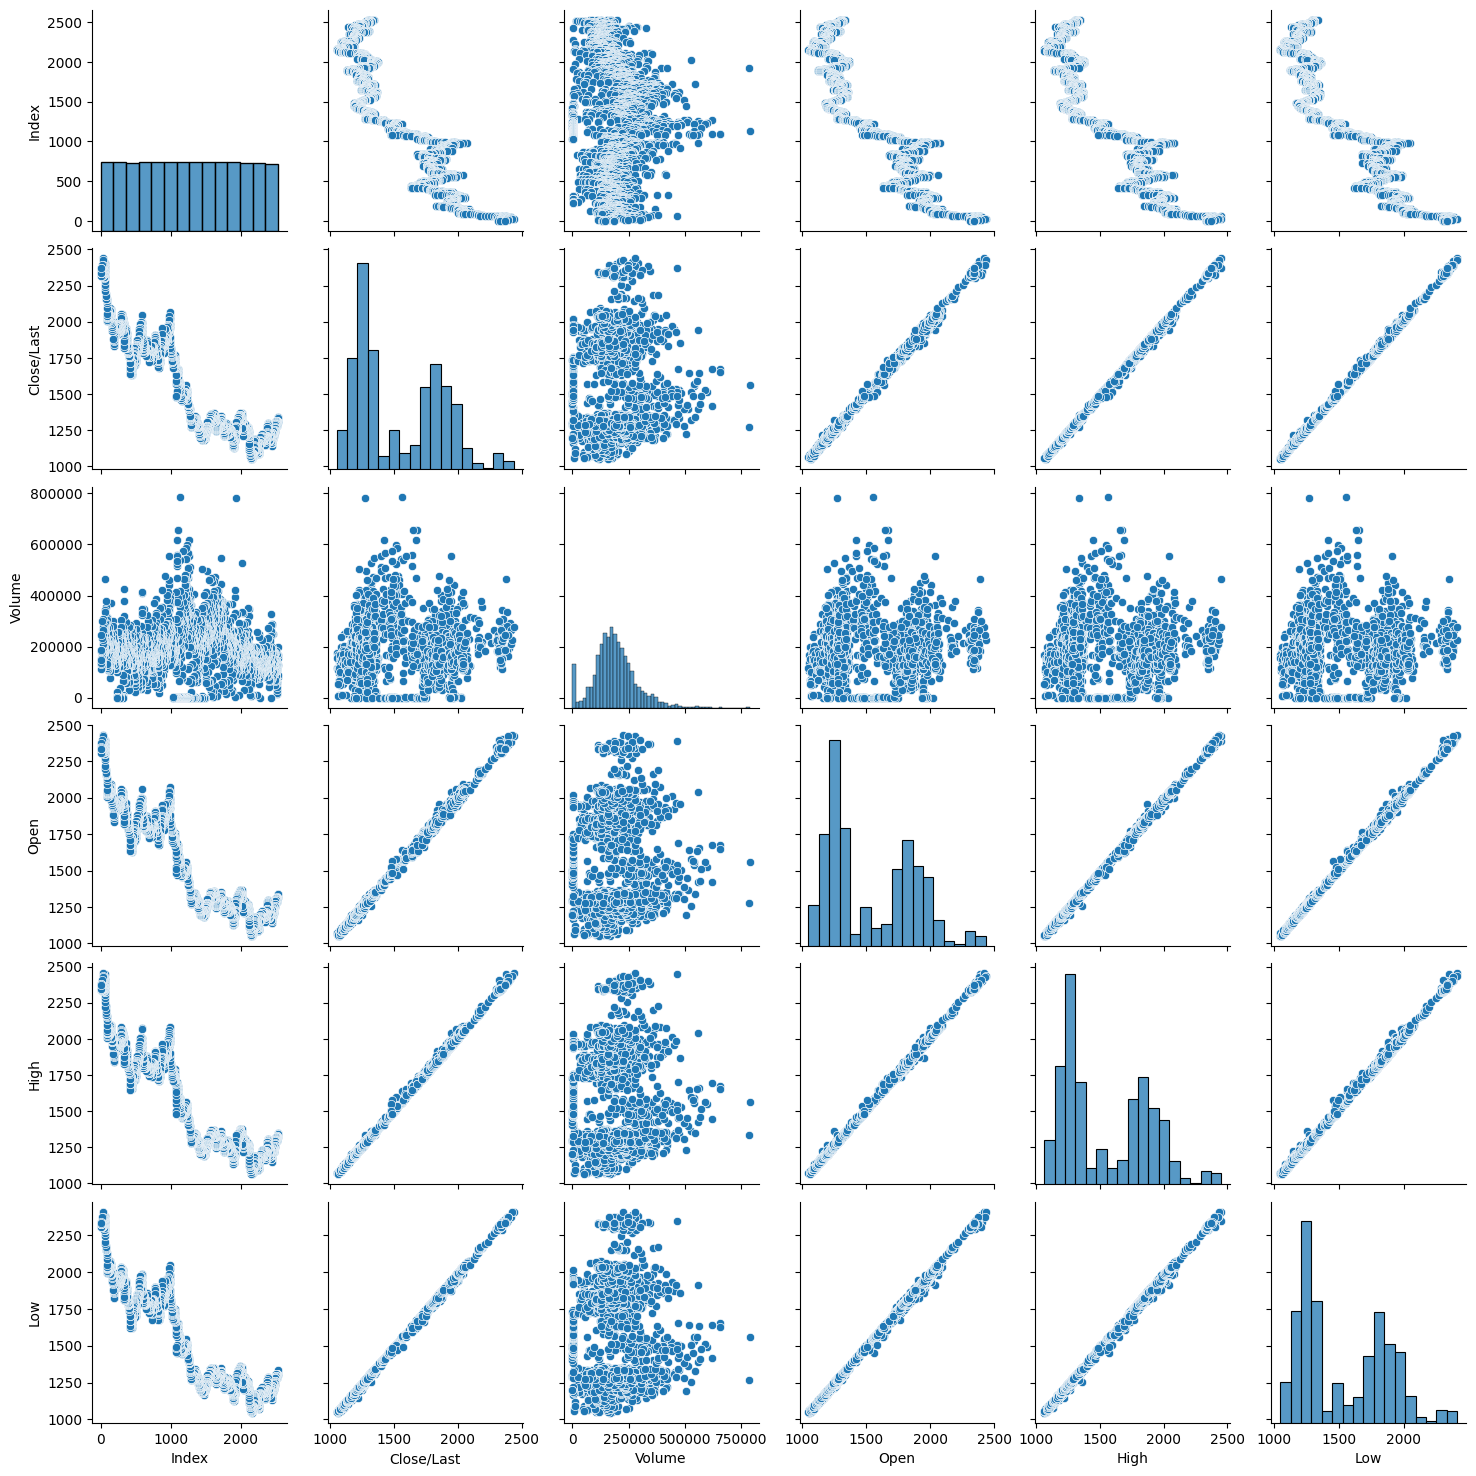

In [10]:
# Plot pair plots to visualize relationships between features
sns.pairplot(df)
plt.show()

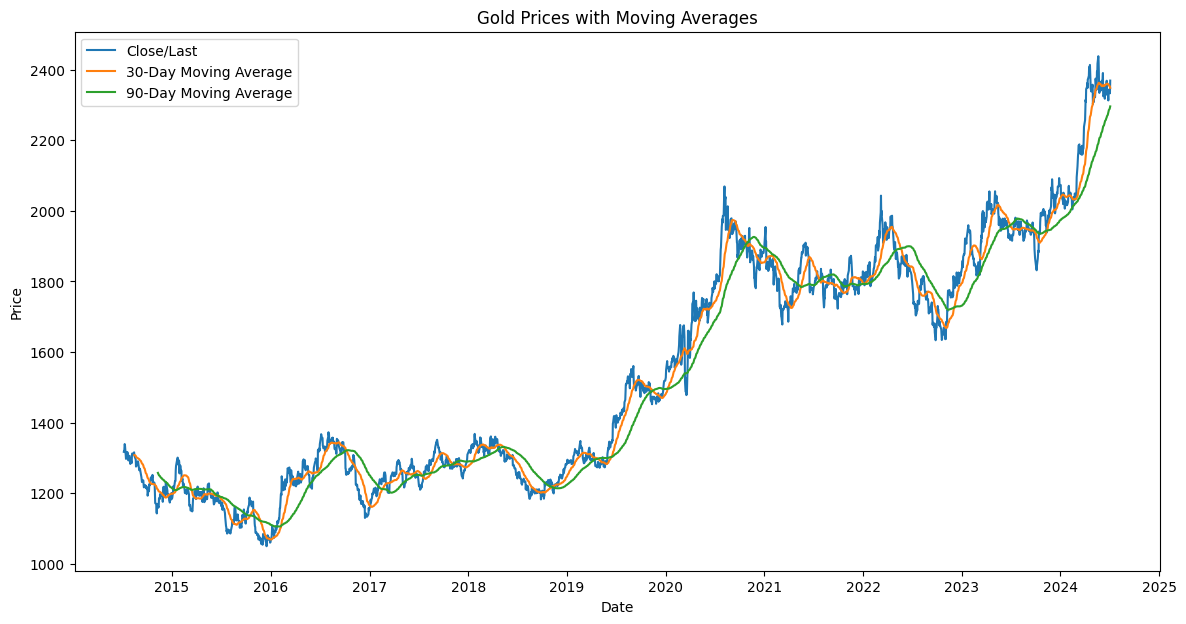

In [13]:
# Calculate moving averages
df['MA_30'] = df['Close/Last'].rolling(window=30).mean()
df['MA_90'] = df['Close/Last'].rolling(window=90).mean()

# Plot the moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Close/Last'], label='Close/Last')
plt.plot(df['MA_30'], label='30-Day Moving Average')
plt.plot(df['MA_90'], label='90-Day Moving Average')
plt.title('Gold Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

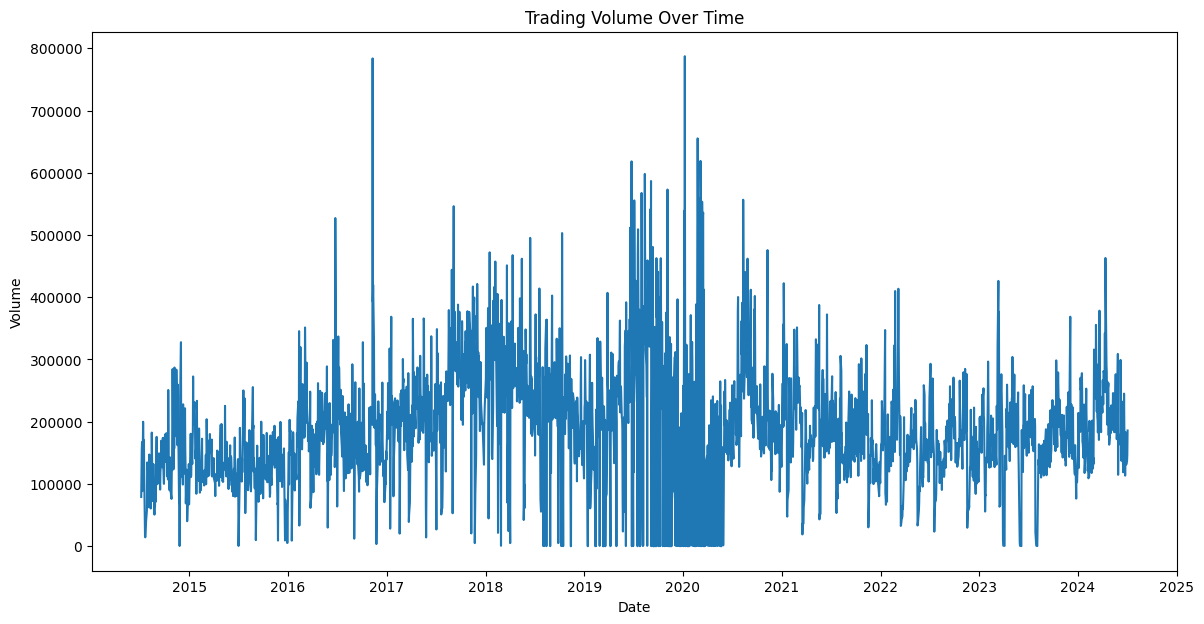

In [14]:
# Plot the volume over time
plt.figure(figsize=(14, 7))
plt.plot(df['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# Feature Engineering

We have two options: 
- Remove the Volume since it is not correlated with the closing, and model only with the other features

- Leave the Volume and just hope that the model can do something with it, but then you need to normalize the features

- Since I have no idea what I am doing, I will try first with the volume 

In [2]:
#### Dataset with the Volume feature
df_with_volume = df.copy()

### Dataset without the Volume feature
df_without_volume = df.drop(columns=['Volume'])

In [3]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the features
df_with_volume[['Close/Last', 'Volume', 'Open', 'High', 'Low']] = scaler.fit_transform(df_with_volume[['Close/Last', 'Volume', 'Open', 'High', 'Low']])

## Shifting Windows no volume (simple approach)

In [4]:


# Ensure the 'Date' column is in datetime format
df_without_volume['Date'] = pd.to_datetime(df_without_volume['Date'], dayfirst=True)

# Sort the dataframe by date
df_without_volume = df_without_volume.sort_values('Date')

# Define window sizes for lag features and rolling statistics
window_sizes = [10, 20, 50, 200]
rolling_windows = [20, 50, 200]

# Dictionary to store dataframes for each window size
dfs_by_window_size = {}

# Create separate dataframes for each window size
for window_size in window_sizes:
    # Create a copy of the original dataframe
    df_window = df_without_volume.copy()
    
    # Create lag features for the current window size
    for i in range(1, window_size + 1):
        df_window[f'Close/Last_Lag_{i}_Window_{window_size}'] = df_window['Close/Last'].shift(i)
    
    # Add rolling statistics for the current window size if applicable
    if window_size in rolling_windows:
        df_window[f'Close/Last_Rolling_Mean_{window_size}'] = df_window['Close/Last'].rolling(window=window_size).mean()
        df_window[f'Close/Last_Rolling_Std_{window_size}'] = df_window['Close/Last'].rolling(window=window_size).std()
    
    # Drop rows with NaN values (which will be the first 'window_size' rows for the largest window size)
    df_window = df_window.dropna()
    
    # Reset index after dropping rows
    df_window = df_window.reset_index(drop=True)
    
    # Store the dataframe in the dictionary
    dfs_by_window_size[window_size] = df_window

# Display the first few rows of each dataframe to verify the lag features and rolling stats
for window_size, df in dfs_by_window_size.items():
    print(f"DataFrame for window size {window_size}:")
    print(df.shape)
    print("\n")

DataFrame for window size 10:
(2501, 16)


DataFrame for window size 20:
(2491, 28)


DataFrame for window size 50:
(2461, 58)


DataFrame for window size 200:
(2311, 208)




C:\Users\Vaquita\AppData\Local\Temp\ipykernel_7772\1725717435.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_window[f'Close/Last_Lag_{i}_Window_{window_size}'] = df_window['Close/Last'].shift(i)
C:\Users\Vaquita\AppData\Local\Temp\ipykernel_7772\1725717435.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_window[f'Close/Last_Lag_{i}_Window_{window_size}'] = df_window['Close/Last'].shift(i)
C:\Users\Vaquita\AppData\Local\Temp\ipykernel_7772\1725717435.py:21: PerformanceWarning: DataFrame is highly fragmented.  This

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression

# Split the data into training and testing sets
train_size = int(0.8 * len(df_without_volume))
train_df = df_without_volume[:train_size]
test_df = df_without_volume[train_size:]

X_train = train_df.drop(columns=['Close/Last'])
y_train = train_df['Close/Last']
X_test = test_df.drop(columns=['Close/Last'])
y_test = test_df['Close/Last']

# Remove features with low variance
selector = VarianceThreshold(threshold=0.01)
X_train_reduced = selector.fit_transform(X_train)
X_test_reduced = selector.transform(X_test)

# Select top k features based on correlation with the target
k = 50  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_train_reduced = selector.fit_transform(X_train_reduced, y_train)
X_test_reduced = selector.transform(X_test_reduced)



## Shifting Windows volume (simple approach)

In [5]:
# Ensure the 'Date' column is in datetime format
df_with_volume['Date'] = pd.to_datetime(df_with_volume['Date'], dayfirst=True)

# Sort the dataframe by date
df_with_volume = df_with_volume.sort_values('Date')

# Create lag features with a window size of 5
window_size = 5
for i in range(1, window_size + 1):
    df_with_volume[f'Close/Last_Lag_{i}'] = df_with_volume['Close/Last'].shift(i)

# Add rolling statistics for 'Close/Last'
df_with_volume['Close/Last_Rolling_Mean_5'] = df_with_volume['Close/Last'].rolling(window=window_size).mean()
df_with_volume['Close/Last_Rolling_Std_5'] = df_with_volume['Close/Last'].rolling(window=window_size).std()

# Drop rows with NaN values (which will be the first 'window_size' rows)
df_with_volume = df_with_volume.dropna()

# Reset index after dropping rows
df_with_volume = df_with_volume.reset_index(drop=True)

# Display the first few rows of the dataframe to verify the lag features and rolling stats
print(df_with_volume)

      Index       Date  Close/Last    Volume      Open      High       Low  \
0      2523 2014-07-14   -0.702941  0.100275 -0.604365 -0.625453 -0.691743   
1      2522 2014-07-15   -0.731721 -0.213203 -0.695483 -0.704250 -0.720770   
2      2521 2014-07-16   -0.723627 -0.834708 -0.737146 -0.734579 -0.718048   
3      2520 2014-07-17   -0.672362 -0.205480 -0.721859 -0.670055 -0.704140   
4      2519 2014-07-18   -0.694847 -0.759655 -0.665510 -0.671244 -0.683276   
...     ...        ...         ...       ...       ...       ...       ...   
2501      4 2024-06-27    2.384608 -0.562478  2.302722  2.351282  2.345829   
2502      3 2024-06-28    2.393602 -0.609901  2.390244  2.376854  2.415071   
2503      2 2024-07-01    2.391503 -0.551358  2.383050  2.371502  2.410536   
2504      1 2024-07-02    2.375015 -0.451133  2.399236  2.363474  2.408117   
2505      0 2024-07-03    2.482940 -0.044720  2.390244  2.447920  2.433213   

      Close/Last_Lag_1  Close/Last_Lag_2  Close/Last_Lag_3  Clo

# Model Selection

### Linear Reg on the without volume dfs 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to run linear regression on a given dataframe
def run_linear_regression(df):
    # Define features (X) and target (y)
    X = df.drop(columns=['Date', 'Close/Last'])
    y = df['Close/Last']
    
    # Determine the split index
    split_index = int(len(df) * 0.8)
    
    # Split the data into training and testing sets
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

# Run linear regression on each dataframe and print the results
for window_size, df_window in dfs_by_window_size.items():
    mse, r2 = run_linear_regression(df_window)
    print(f'Window Size: {window_size}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print('---')

Window Size: 10
Mean Squared Error: 49.01511581579234
R^2 Score: 0.9986721335672496
---
Window Size: 20
Mean Squared Error: 3.298051157239545e-23
R^2 Score: 1.0
---
Window Size: 50
Mean Squared Error: 2.9561346167974563e-22
R^2 Score: 1.0
---
Window Size: 200
Mean Squared Error: 2.921405680296667e-20
R^2 Score: 1.0
---


### Catboost reg

In [3]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Function to run CatBoost regressor on a given dataframe
def run_catboost_regressor(df):
    # Define features (X) and target (y)
    X = df.drop(columns=['Date', 'Close/Last'])
    y = df['Close/Last']
    
    # Determine the split index
    split_index = int(len(df) * 0.8)
    
    # Split the data into training and testing sets
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Initialize and train the CatBoost regressor
    model = CatBoostRegressor(verbose=0)
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

# Run CatBoost regressor on each dataframe and print the results
for window_size, df_window in dfs_by_window_size.items():
    mse, r2 = run_catboost_regressor(df_window)
    print(f'Window Size: {window_size}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print('---')

Window Size: 10
Mean Squared Error: 14617.027769819722
R^2 Score: 0.604010717937134
---
Window Size: 20
Mean Squared Error: 18202.811690051156
R^2 Score: 0.5069704053802007
---
Window Size: 50
Mean Squared Error: 19863.577752295507
R^2 Score: 0.4586684290772536
---
Window Size: 200
Mean Squared Error: 27021.825963365012
R^2 Score: 0.25076383475626796
---


## RF Reg

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Function to run Random Forest Regressor on a given dataframe
def run_random_forest_regressor(df):
    # Define features (X) and target (y)
    X = df.drop(columns=['Date', 'Close/Last'])
    y = df['Close/Last']
    
    # Determine the split index
    split_index = int(len(df) * 0.8)
    
    # Split the data into training and testing sets
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Initialize and train the Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, r2

# Run Random Forest Regressor on each dataframe and print the results
for window_size, df_window in dfs_by_window_size.items():
    mse, r2 = run_random_forest_regressor(df_window)
    print(f'Window Size: {window_size}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print('---')

Window Size: 10
Mean Squared Error: 13037.644474658797
R^2 Score: 0.6467977240919818
---
Window Size: 20
Mean Squared Error: 13978.3702942044
R^2 Score: 0.6213908951569409
---
Window Size: 50
Mean Squared Error: 14298.449442342906
R^2 Score: 0.6103319253507355
---
Window Size: 200
Mean Squared Error: 15796.027341408297
R^2 Score: 0.5620223826692097
---


## LSTM

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Function to prepare data for LSTM
def prepare_data(df, target_column, test_size=0.2):
    X = df.drop(columns=[target_column, 'Date']).values
    y = df[target_column].values
    
    # Reshape X to be 3D [samples, timesteps, features]
    X = X.reshape((X.shape[0], 1, X.shape[1]))
    
    # Split the data into training and testing sets
    train_size = int(len(X) * (1 - test_size))
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    return X_train, X_test, y_train, y_test

# Function to create and train LSTM model
def train_lstm(X_train, y_train, X_test, y_test, epochs=100, batch_size=32):
    model = Sequential()
    model.add(Bidirectional(LSTM(16, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]))))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    
    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)
    
    return model

# Train and evaluate LSTM model for each window size
for window_size, df_window in dfs_by_window_size.items():
    print(f"Training LSTM model for window size: {window_size}")
    
    # Prepare the data
    X_train, X_test, y_train, y_test = prepare_data(df_window, 'Close/Last')
    
    # Train the LSTM model
    model = train_lstm(X_train, y_train, X_test, y_test)
    
    # Evaluate the model
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss for window size {window_size}: {loss}")

print("Training and evaluation completed.")

Training LSTM model for window size: 10
Epoch 1/100


C:\Users\Vaquita\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 912182.1875 - val_loss: 91935.9766
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 293475.5000 - val_loss: 65655.9844
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257113.6094 - val_loss: 84940.0859
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 312549.6875 - val_loss: 92379.2734
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 284014.8125 - val_loss: 83163.6250
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257456.2969 - val_loss: 56018.0703
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 310144.1875 - val_loss: 44144.3789
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 267329.5938 - val_loss: 72243.0781
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 283693.4375 - val_loss: 69065.1016
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 265714.7500 - val_loss: 50990.4805
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 271213.4375

C:\Users\Vaquita\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2134127.0000 - val_loss: 3914530.2500
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2132937.0000 - val_loss: 3914282.0000
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2142106.0000 - val_loss: 3914035.0000
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2134820.0000 - val_loss: 3913786.5000
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2110423.5000 - val_loss: 3913538.7500
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2127830.7500 - val_loss: 3913291.5000
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2110886.2500 - val_loss: 3913043.0000
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2137281.7500 - val_loss: 3912794.7500
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2131004.5000 - val_loss: 3912547.0000
Epoch 10/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2148802.7500 - val_loss: 3912299.0000
Epoch 11/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0

C:\Users\Vaquita\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2831090.2500 - val_loss: 3925551.5000
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2143389.0000 - val_loss: 3925316.0000
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2168475.7500 - val_loss: 3925076.0000
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2164747.2500 - val_loss: 3924834.7500
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2155835.5000 - val_loss: 3924593.5000
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2135650.2500 - val_loss: 3924350.5000
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2166760.7500 - val_loss: 3924108.0000
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2154782.7500 - val_loss: 3923865.7500
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2144338.0000 - val_loss: 3923622.7500
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2175221.0000 - val_loss: 3923378.2500
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0

C:\Users\Vaquita\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 505190.2500 - val_loss: 75587.9531
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 372211.4688 - val_loss: 109225.5156
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 376314.7188 - val_loss: 139395.8906
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 392142.9375 - val_loss: 233554.7188
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 399792.0312 - val_loss: 244219.2344
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 412050.5625 - val_loss: 138313.6719
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 419391.6250 - val_loss: 64913.2500
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 417385.6250 - val_loss: 200219.5000
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 408697.5625 - val_loss: 113986.1172
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 380627.6562 - val_loss: 140545.8281
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 421